# Workout data extraction and visualisation

- Import data from cloud

- Explore and process the data
- Visualise the data

## Set up workspace and Import Data

In [1]:
# Set up workspace

libraries_installed = False

libraries = {
    "numpy": "np",
    "pandas": "pd",
    "matplotlib.pyplot": "plt",
    "matplotlib.dates": "mdates",
    "seaborn": "sns"
}

for lib, alias in libraries.items():
    try:
        # Dynamically import the library or submodule
        if '.' in lib:
            module = __import__(lib, fromlist=[lib.split('.')[-1]])
        else:
            module = __import__(lib)
        globals()[alias] = module  # Assign the imported library or submodule to the alias
    except ImportError:
        # Install the entire library as is
        base_package = lib.split('.')[0] if '.' in lib else lib
        print(f"{base_package} is not installed. Installing...")
        !pip install {base_package}
        libraries_installed = True

print("\nRestart Kernel as libraries were installed!") if libraries_installed else print("No libraries installed!")

No libraries installed!


In [2]:
# download excel file
download_link = 'https://docs.google.com/spreadsheets/d/1-0gquROk1n-UWdteg5P49QceZ49pPqDZ/export?format=csv'

df = pd.read_csv(download_link) # reads the binary excel data as if it were a file and saves as a dataframe

print(df.head())
print(df.shape)

         date            exercise variation  weight_kg  reps  sets  \
0  14/10/2021             Pullups       NaN        1.0    10   2.0   
1  14/10/2021             Pullups       NaN        1.0     7   2.0   
2  14/10/2021             Pullups       NaN        1.0     5   2.0   
3  14/10/2021             Pullups       NaN        1.0     6   1.0   
4  17/10/2021  Bent Row (Barbell)       NaN       85.0     3   4.0   

   total_reps  total_volume  notes  
0        20.0          20.0    NaN  
1        14.0          14.0    NaN  
2        10.0          10.0    NaN  
3         6.0           6.0    NaN  
4        12.0        1020.0    NaN  
(458, 9)


## Pre-process the data

In [3]:
# drop the columns we don't want

variables = df.columns.to_list()
print(variables)

variables = [ col for col in variables if col != 'notes' and col != 'variation' and col != 'total_volume' and col != 'total_reps']
df = df[variables]
print(variables)

['date', 'exercise', 'variation', 'weight_kg', 'reps', 'sets', 'total_reps', 'total_volume', 'notes']
['date', 'exercise', 'weight_kg', 'reps', 'sets']


In [4]:
# convert dates to datatime in pandas

df['date'] = pd.to_datetime(df['date'], dayfirst=True)
print(df.head())


        date            exercise  weight_kg  reps  sets
0 2021-10-14             Pullups        1.0    10   2.0
1 2021-10-14             Pullups        1.0     7   2.0
2 2021-10-14             Pullups        1.0     5   2.0
3 2021-10-14             Pullups        1.0     6   1.0
4 2021-10-17  Bent Row (Barbell)       85.0     3   4.0


In [5]:
# extract dumbell exercises to accurately calculate volume
df['exercise'] = df['exercise'].str.lower() # convert values to lower
exercises = sorted(list(set(df['exercise'])))
print(exercises)

dumbell_exercises = [exercise for exercise in exercises if "dumbell" in exercise] # create list of dumbell exercises

print(dumbell_exercises)

['bench (barbell)', 'bench (dumbells)', 'bent row (barbell)', 'bent row (dumbells)', 'bicep curl (dumbells)', 'calf raise', 'deadlift', 'dips', 'front squat', 'hammer curl (dumbells)', 'incline bench (barbell)', 'incline bench (dumbells)', 'ohp (barbell)', 'ohp (dumbells)', 'pullups', 'rdl', 'rear raise (dumbells)', 'shrug (dumbells)', 'side raise (dumbells)', 'single leg rdl', 'single leg split squat', 'skull crusher (dumbells)', 'squat', 'upright row']
['bench (dumbells)', 'bent row (dumbells)', 'bicep curl (dumbells)', 'hammer curl (dumbells)', 'incline bench (dumbells)', 'ohp (dumbells)', 'rear raise (dumbells)', 'shrug (dumbells)', 'side raise (dumbells)', 'skull crusher (dumbells)']


In [6]:
# the total_reps and total_volume columns sometimes format incorrectly, so we will recreate them here

df['total_reps'] = df['reps'] * df['sets']
df['volume'] =  np.where(
    df['exercise'].isin(dumbell_exercises),
    df['total_reps'] * df['weight_kg'] * 2, 
    df['total_reps'] * df['weight_kg']
)
dumbells = df[df['exercise'].isin(dumbell_exercises)]
print(df.head(50))

         date                  exercise  weight_kg  reps  sets  total_reps  \
0  2021-10-14                   pullups        1.0    10   2.0        20.0   
1  2021-10-14                   pullups        1.0     7   2.0        14.0   
2  2021-10-14                   pullups        1.0     5   2.0        10.0   
3  2021-10-14                   pullups        1.0     6   1.0         6.0   
4  2021-10-17        bent row (barbell)       85.0     3   4.0        12.0   
5  2021-10-17        bent row (barbell)       85.0     3   4.0        12.0   
6  2021-10-20                   pullups       10.0     5  14.0        70.0   
7  2021-10-20                   pullups       10.0     4   1.0         4.0   
8  2021-10-20                   pullups       10.0     1   1.0         1.0   
9  2021-10-24           bench (barbell)       95.0     1   6.0         6.0   
10 2021-10-24           bench (barbell)      100.0     1   1.0         1.0   
11 2021-10-25   incline bench (barbell)       75.0     2   6.0  

## Generate Visualisations

          date  exercise  weight_kg  reps  sets  total_reps   volume
41  2024-01-11  deadlift      140.0     5   5.0        25.0   3500.0
52  2024-01-22  deadlift      180.0     1   1.0         1.0    180.0
75  2024-01-30  deadlift      140.0     8   1.0         8.0   1120.0
89  2024-04-20  deadlift      140.0     5  10.0        50.0   7000.0
106 2024-04-28  deadlift      150.0     6   1.0         6.0    900.0
113 2024-07-10  deadlift      150.0     5   3.0        15.0   2250.0
128 2024-07-18  deadlift      150.0     5   1.0         5.0    750.0
145 2024-07-25  deadlift      150.0     5   5.0        25.0   3750.0
167 2024-08-06  deadlift      150.0     5   3.0        15.0   2250.0
181 2024-08-14  deadlift      150.0     5   5.0        25.0   3750.0
202 2024-08-23  deadlift      150.0     5   6.0        30.0   4500.0
215 2024-09-02  deadlift      150.0     5   7.0        35.0   5250.0
232 2024-09-11  deadlift      190.0     1   1.0         1.0    190.0
250 2024-09-21  deadlift      120.

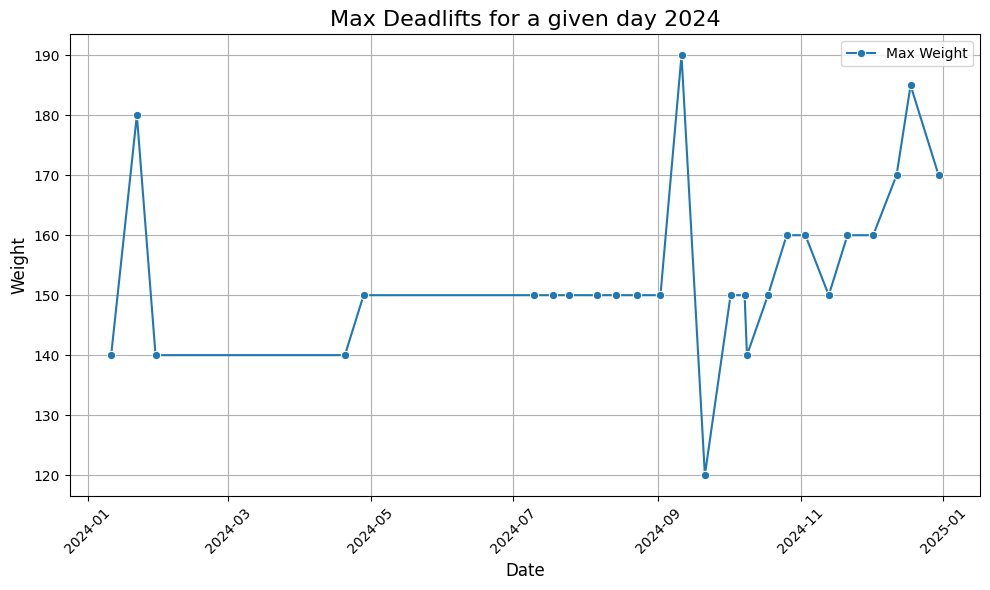

In [12]:
# create a plot visualising deadlift progression for the year 2024

# create a df containing deadlift and dates from 2024
deadlift_max_2024 = df[
    (df['exercise'] == 'deadlift') &
    (df['date'] >= '2024-01-01' ) &
    (df['date'] <= '2024-12-31' )
     ]

# group the entries by date and only select the one with the highest value for weight_kg
deadlift_max_2024 = deadlift_max_2024.loc[deadlift_max_2024.groupby('date')['weight_kg'].idxmax()]

print(deadlift_max_2024)

# Line plot for date vs. weight
plt.figure(figsize=(10, 6))
sns.lineplot(data=deadlift_max_2024, x='date', y='weight_kg', marker='o', label='Max Weight')

# Add titles and labels
plt.title('Max Deadlifts for a given day 2024', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Weight', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.legend()
plt.tight_layout()
plt.show()

# LETS ADD ANOTHER LINE THAT PLOTS TOTAL VOLUME FOR DEADLIFT ON EACH OF THESE DAYS TO COMPARE THE RELATIONSHIP


         date  total_volume
0  2024-01-11        3500.0
1  2024-01-22        1440.0
2  2024-01-30        2840.0
3  2024-04-20        7000.0
4  2024-04-28         900.0
5  2024-07-10        2250.0
6  2024-07-18        1800.0
7  2024-07-25        3750.0
8  2024-08-06        2250.0
9  2024-08-14        4050.0
10 2024-08-23        4500.0
11 2024-09-02        5250.0
12 2024-09-11         190.0
13 2024-09-21       14400.0
14 2024-10-02        3750.0
15 2024-10-08        1350.0
16 2024-10-09        5880.0
17 2024-10-18        7500.0
18 2024-10-26        1440.0
19 2024-11-03         960.0
20 2024-11-13         750.0
21 2024-11-21        1920.0
22 2024-12-02       10000.0
23 2024-12-12         510.0
24 2024-12-18         185.0
25 2024-12-30        1530.0


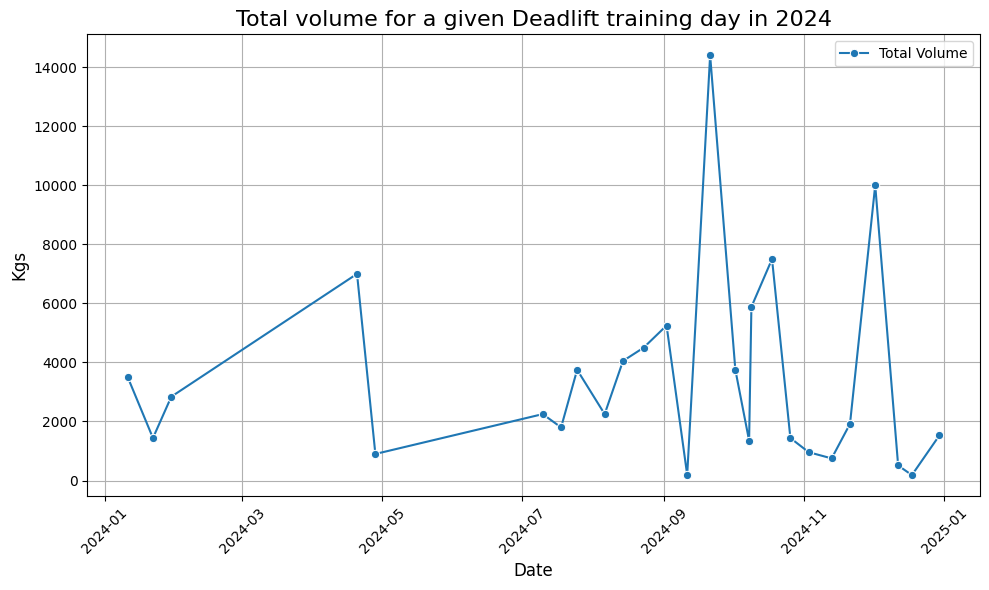

In [13]:
# create a plot visualising deadlift volume for a given day in 2024
deadlift_volume_2024 =  df[
    (df['exercise'] == 'deadlift') &
    (df['date'] >= '2024-01-01' ) &
    (df['date'] <= '2024-12-31' )
     ]


deadlift_volume_2024 = deadlift_volume_2024.groupby('date', as_index=False)['volume'].sum()
deadlift_volume_2024 = deadlift_volume_2024.rename(columns={'volume': 'total_volume'})
                                                          
print(deadlift_volume_2024)

# Line plot for total volume per day
plt.figure(figsize=(10, 6))
sns.lineplot(data=deadlift_volume_2024, x='date', y='total_volume', marker='o', label='Total Volume')

# Add titles and labels
plt.title('Total volume for a given Deadlift training day in 2024', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Kgs', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.legend()
plt.tight_layout()
plt.show()

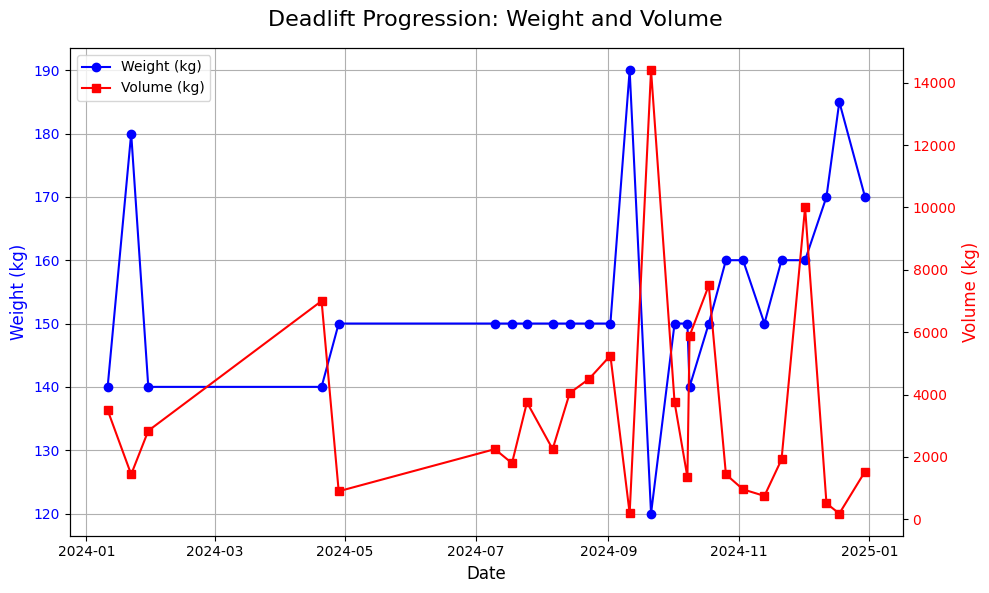

In [17]:
# Plotting both volume and max weight for deadlift

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first DataFrame (weight) on the left y-axis
ax1.plot(deadlift_max_2024['date'], deadlift_max_2024['weight_kg'], color='blue', marker='o', label='Weight (kg)')
ax1.set_ylabel('Weight (kg)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Date', fontsize=12)
ax1.grid(True)

# Create the second y-axis sharing the same x-axis
ax2 = ax1.twinx()  # This creates a second y-axis
ax2.plot(deadlift_volume_2024['date'], deadlift_volume_2024['total_volume'], color='red', marker='s', label='Volume (kg)')
ax2.set_ylabel('Volume (kg)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# titles and legends
fig.suptitle('Deadlift Progression: Weight and Volume', fontsize=16)
fig.tight_layout()  # Adjust layout to prevent overlap
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()

          date               exercise  weight_kg  reps  sets  total_reps  \
161 2024-08-01                pullups        1.0     5  30.0       150.0   
162 2024-08-01                pullups        1.0     4   7.0        28.0   
163 2024-08-01                pullups        1.0     3   3.0         9.0   
164 2024-08-04                   dips       10.0    26   NaN         NaN   
165 2024-08-04                   dips        8.0     3   NaN         NaN   
..         ...                    ...        ...   ...   ...         ...   
444 2024-12-28  bicep curl (dumbells)       15.0    10   6.0        60.0   
445 2024-12-29             calf raise      120.0    16   5.0        80.0   
446 2024-12-30               deadlift      170.0     3   3.0         9.0   
447 2024-12-31            upright row       45.0    10   6.0        60.0   
448 2024-12-31       shrug (dumbells)       30.0    20   6.0       120.0   

     volume  
161   150.0  
162    28.0  
163     9.0  
164     NaN  
165     NaN  
.. 

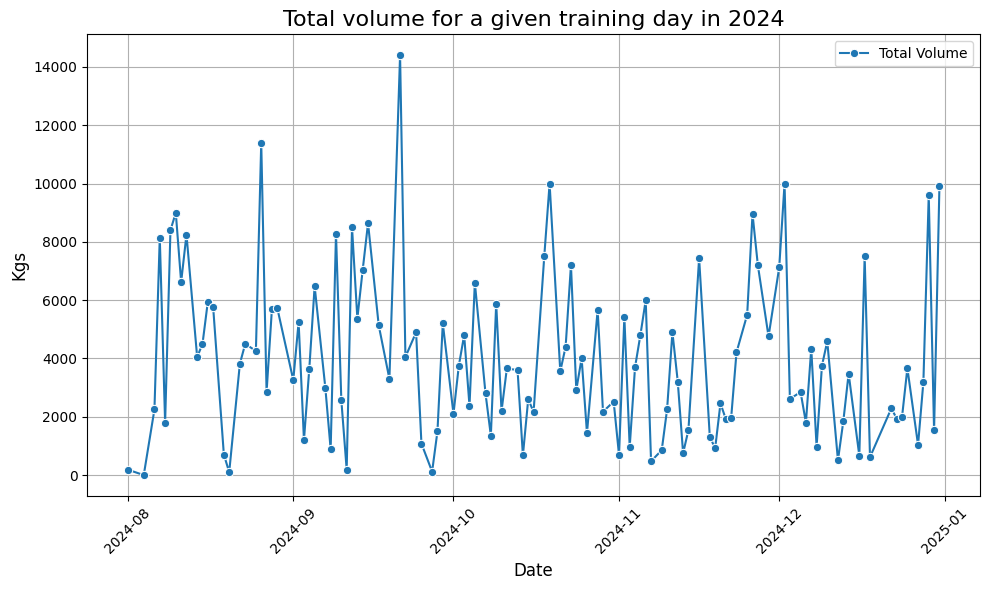

In [15]:
# create a plot visualising total training volume for a given day in 2024
total_volume_per_day =  df[
    (df['date'] >= '2024-08-01' ) &
    (df['date'] <= '2024-12-31' )
     ]

print(total_volume_per_day)

total_volume_per_day = total_volume_per_day.groupby('date', as_index=False)['volume'].sum()
total_volume_per_day = total_volume_per_day.rename(columns={'volume': 'total_volume'})
                                                          
print(total_volume_per_day)

# Line plot for total volume per day
plt.figure(figsize=(10, 6))
sns.lineplot(data=total_volume_per_day, x='date', y='total_volume', marker='o', label='Total Volume')

# Add titles and labels
plt.title('Total volume for a given training day in 2024', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Kgs', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.legend()
plt.tight_layout()
plt.show()


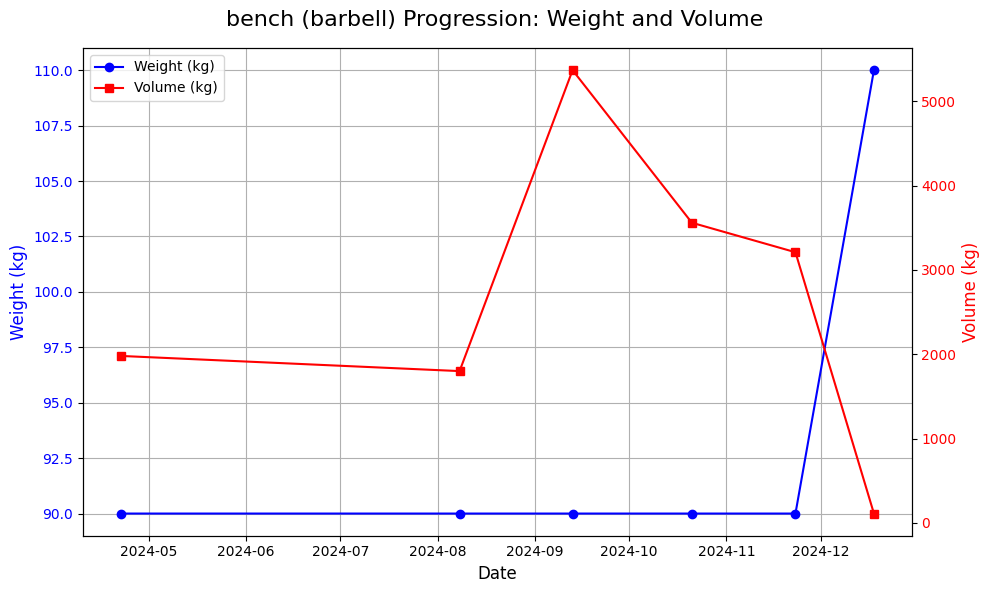

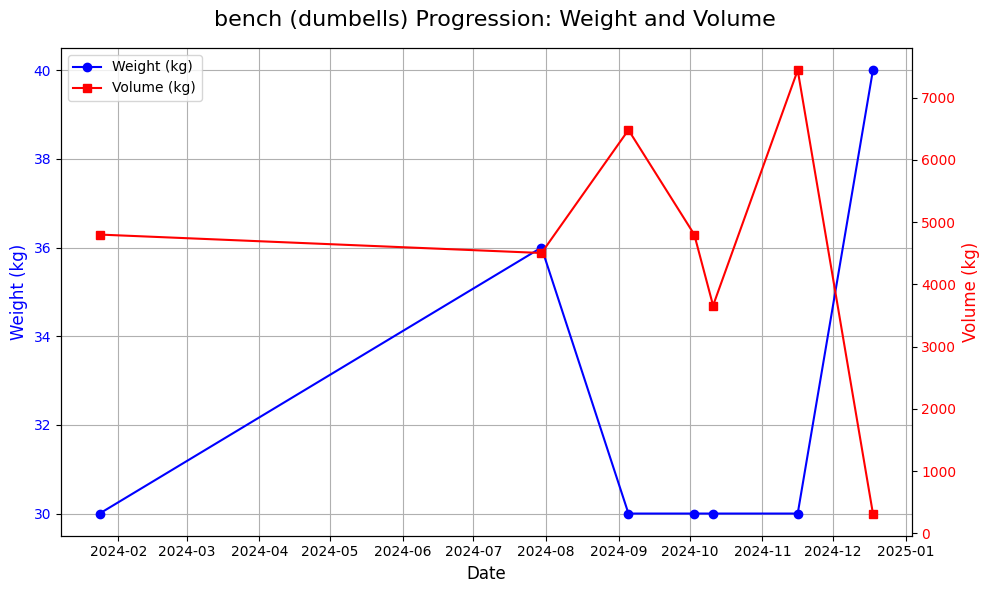

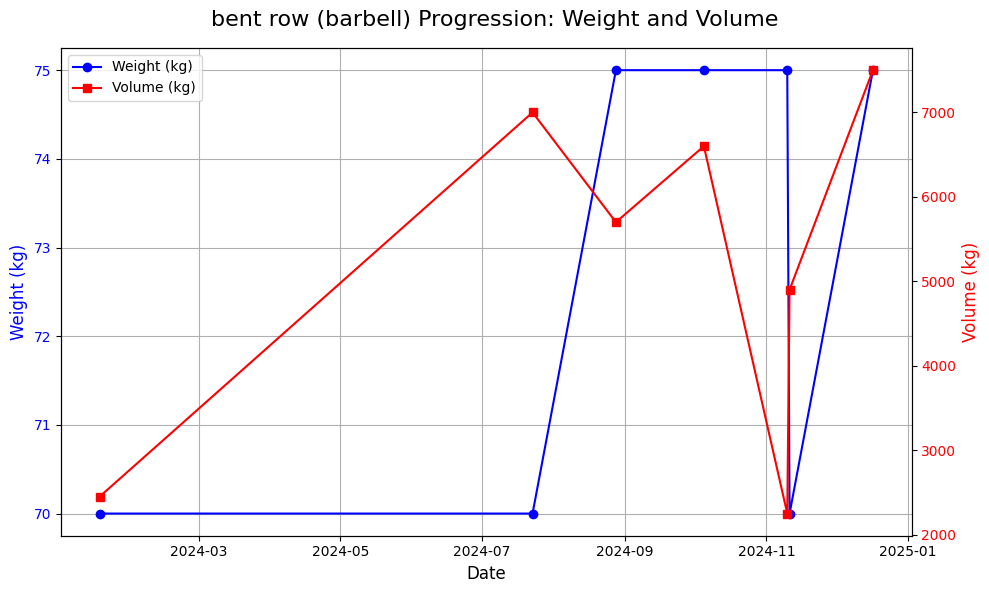

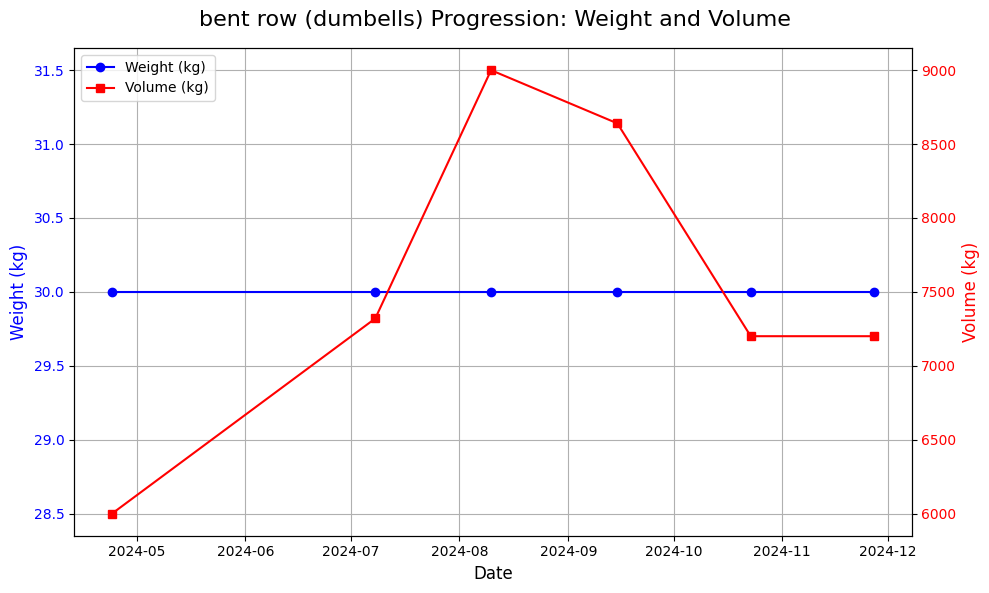

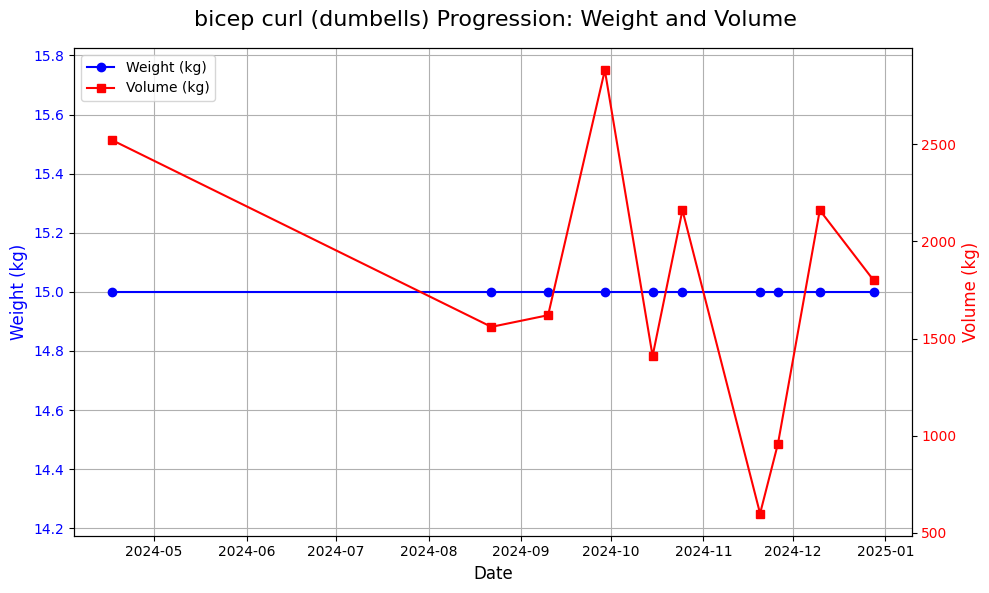

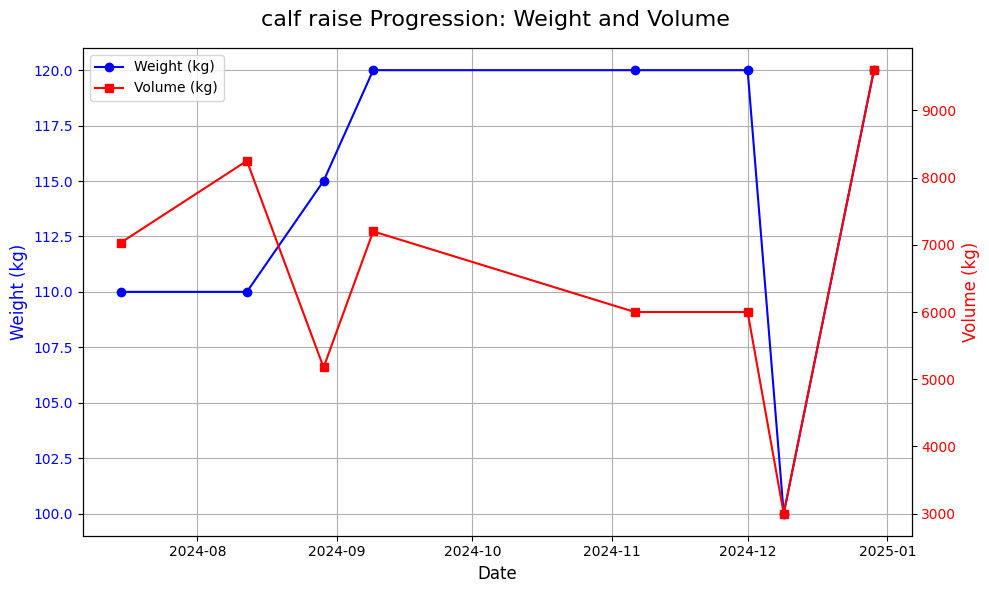

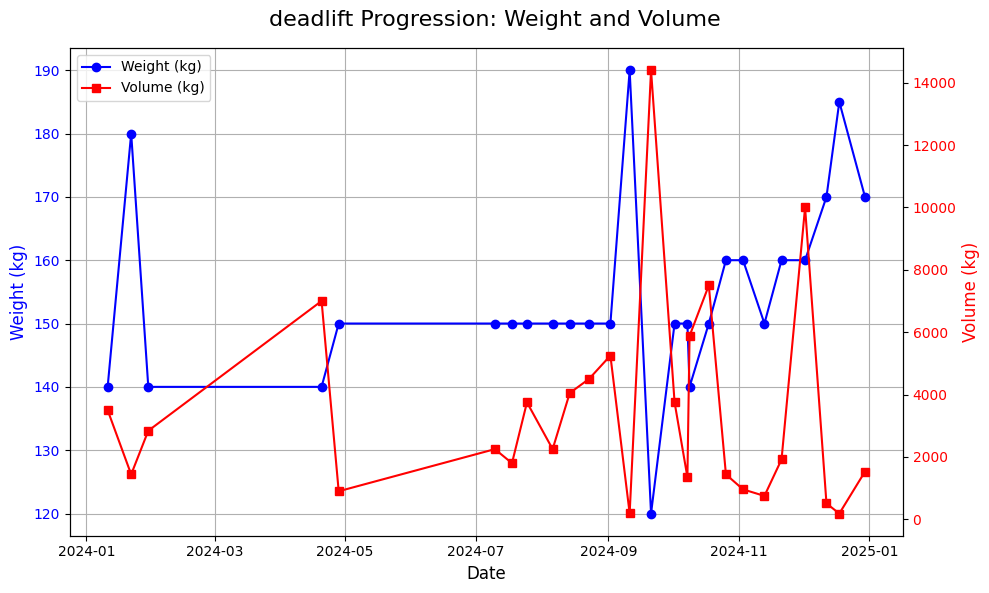

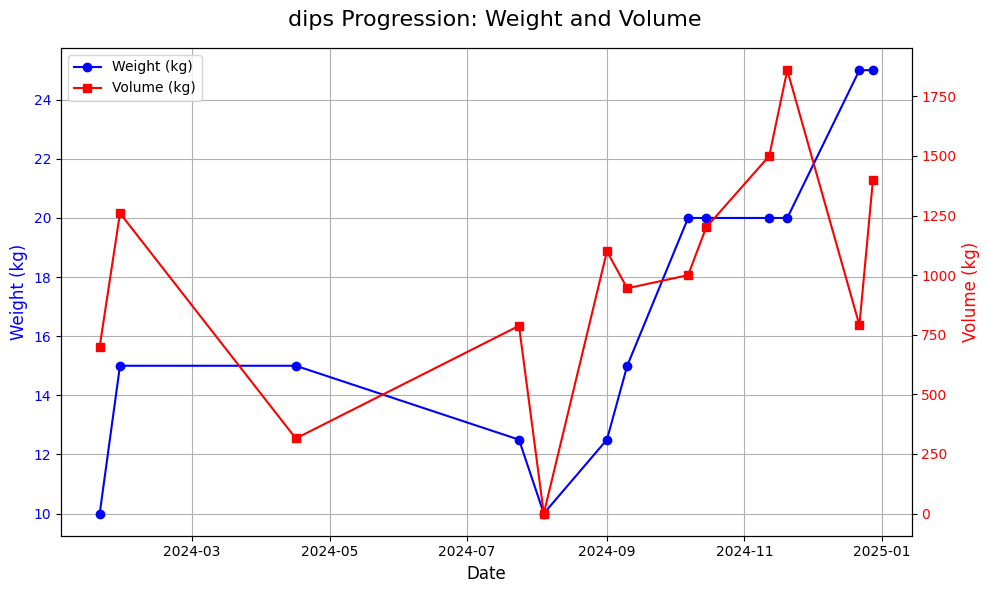

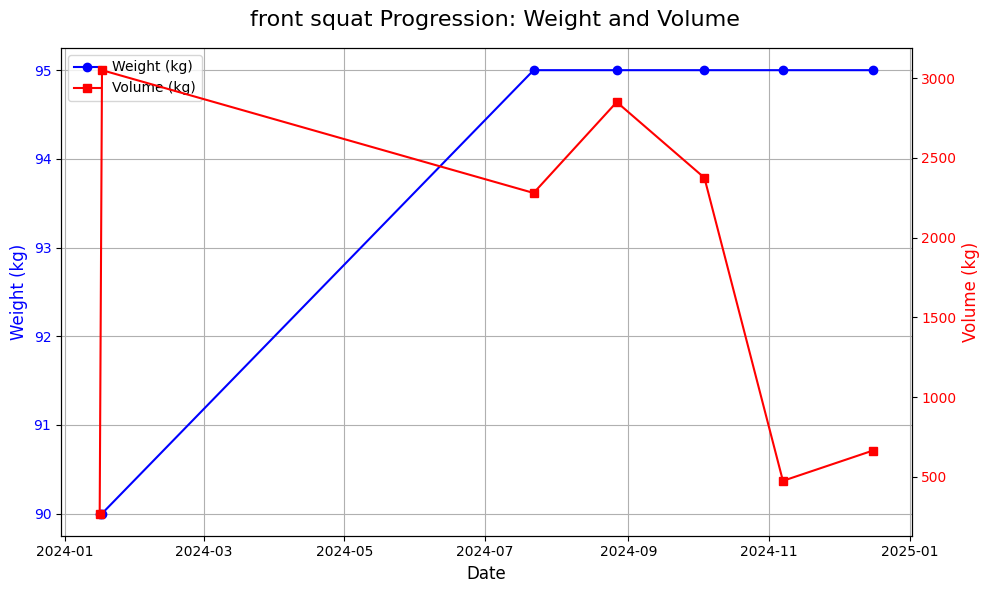

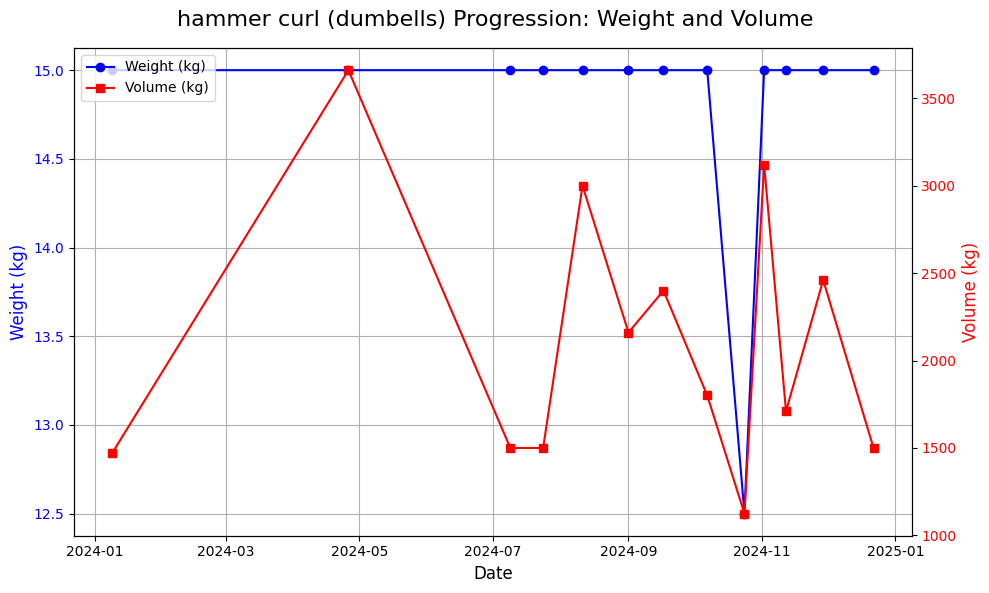

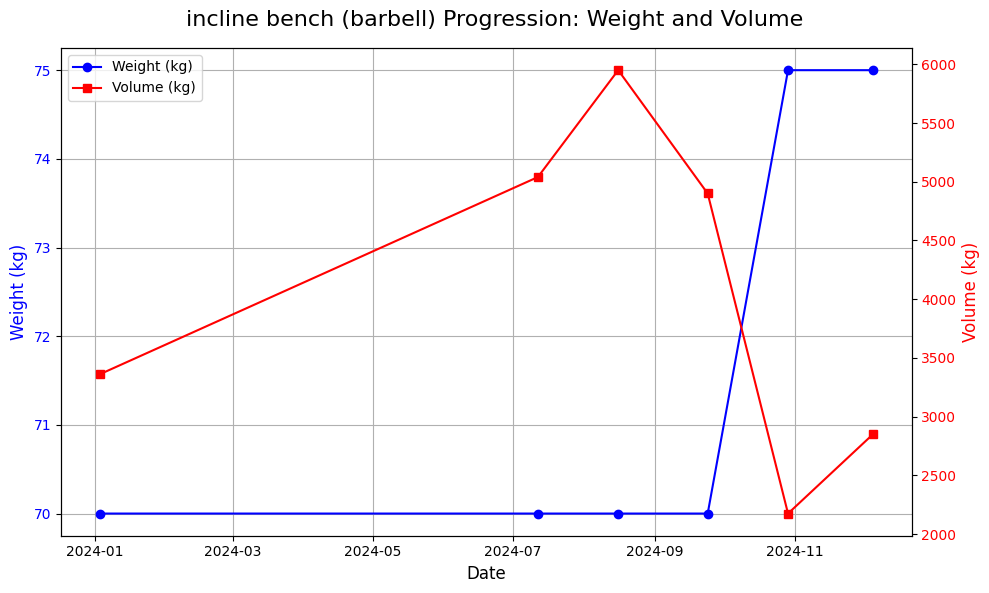

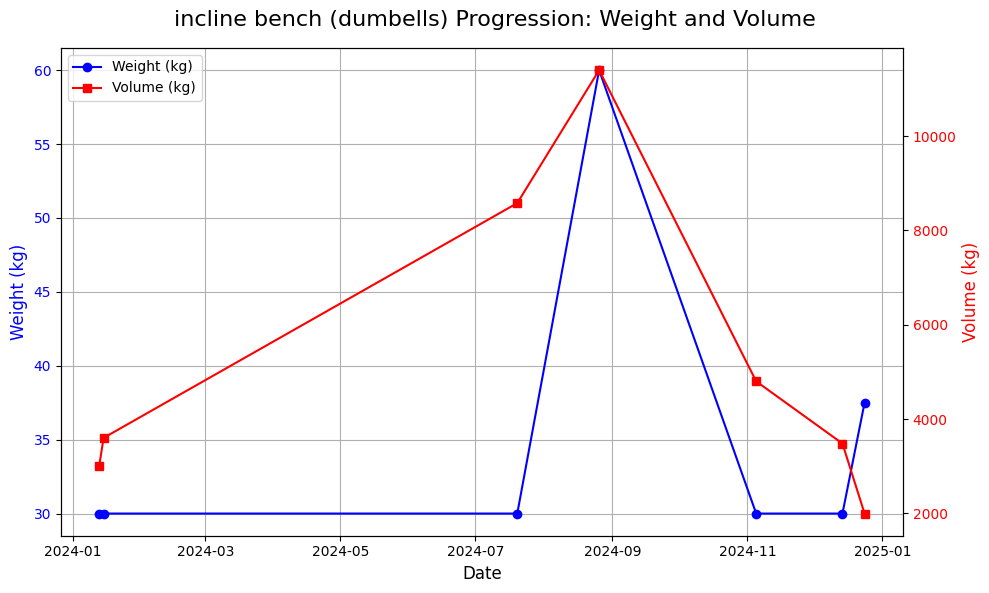

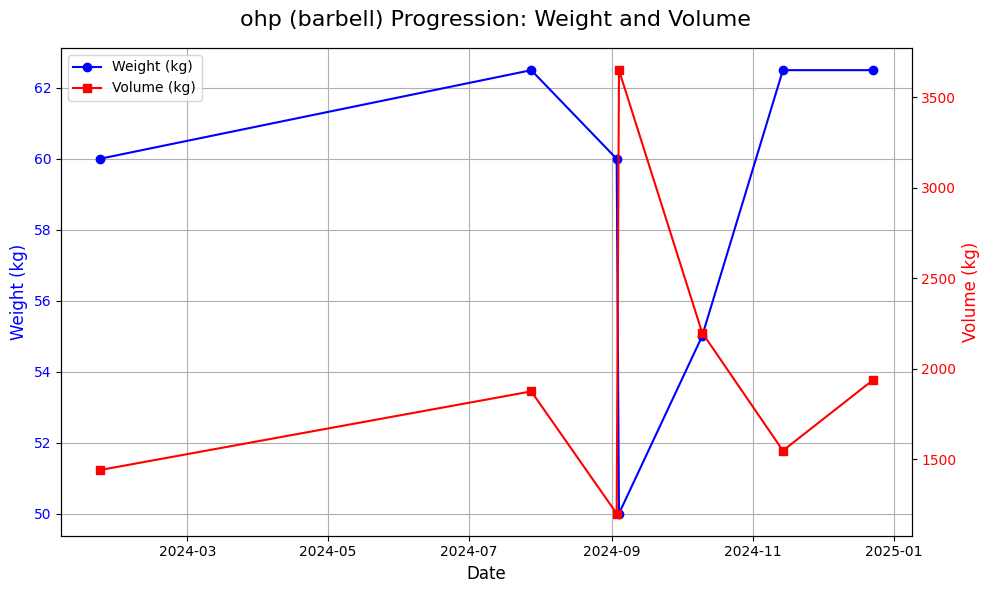

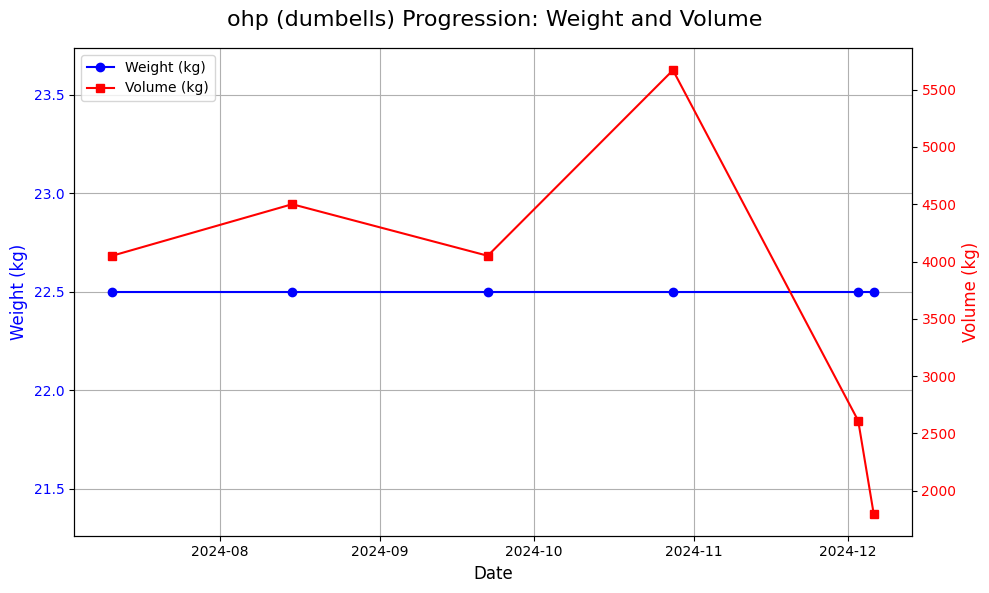

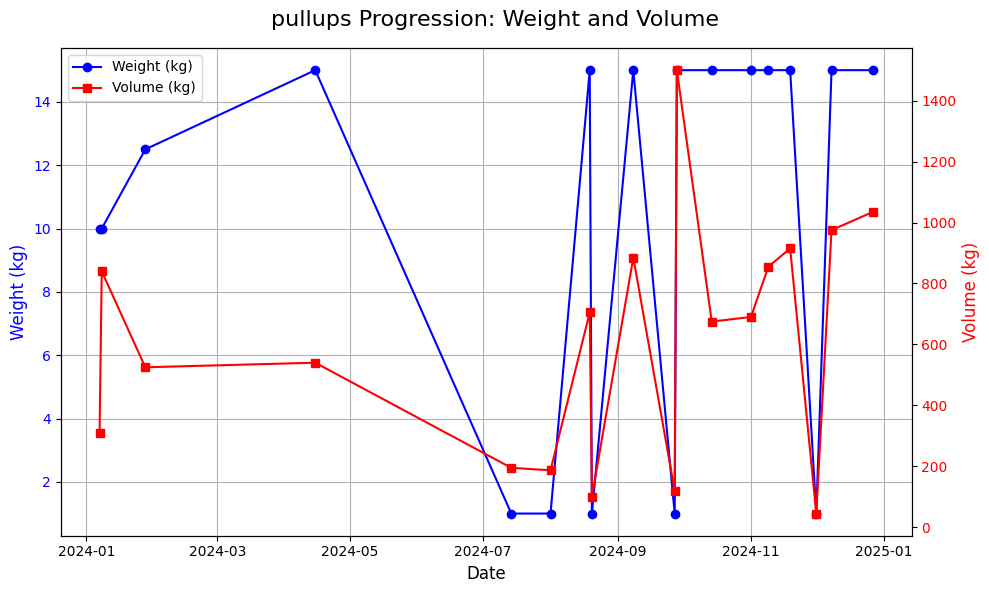

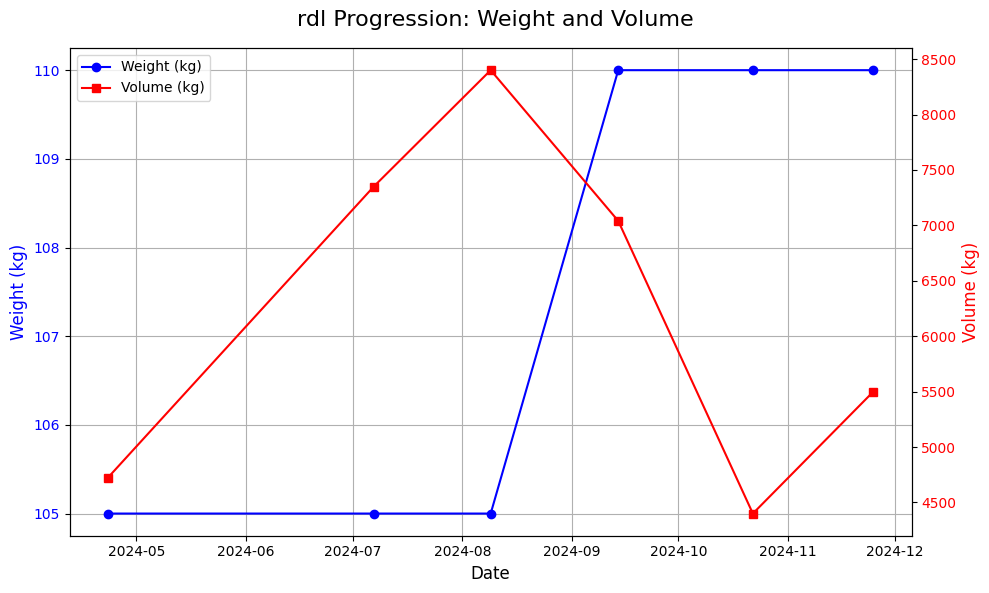

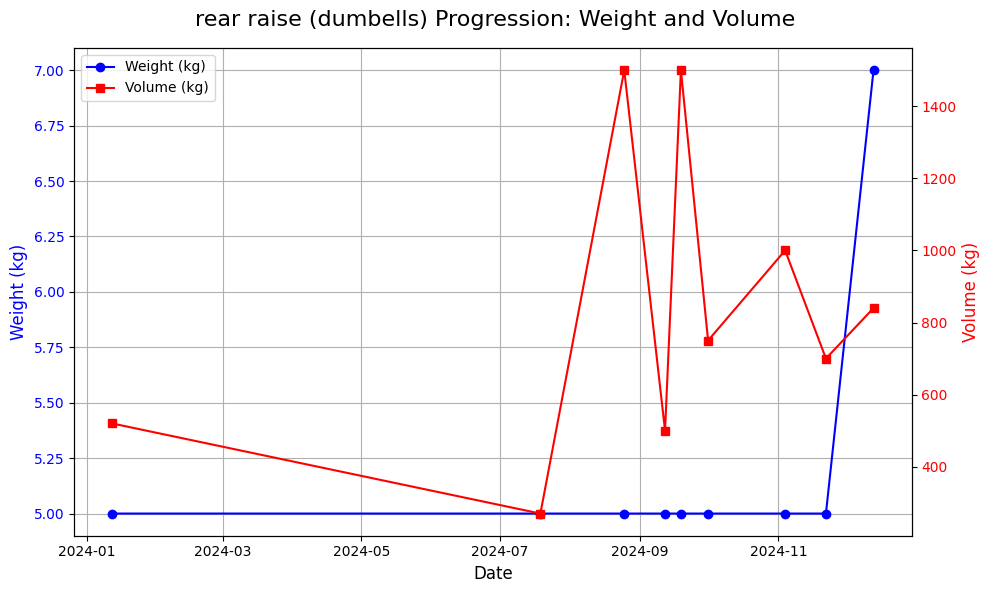

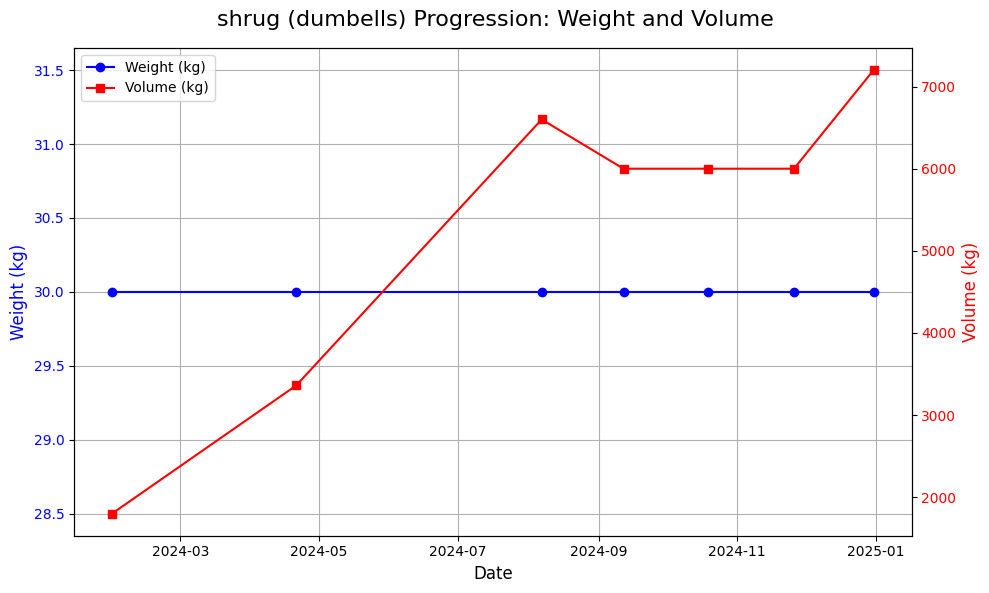

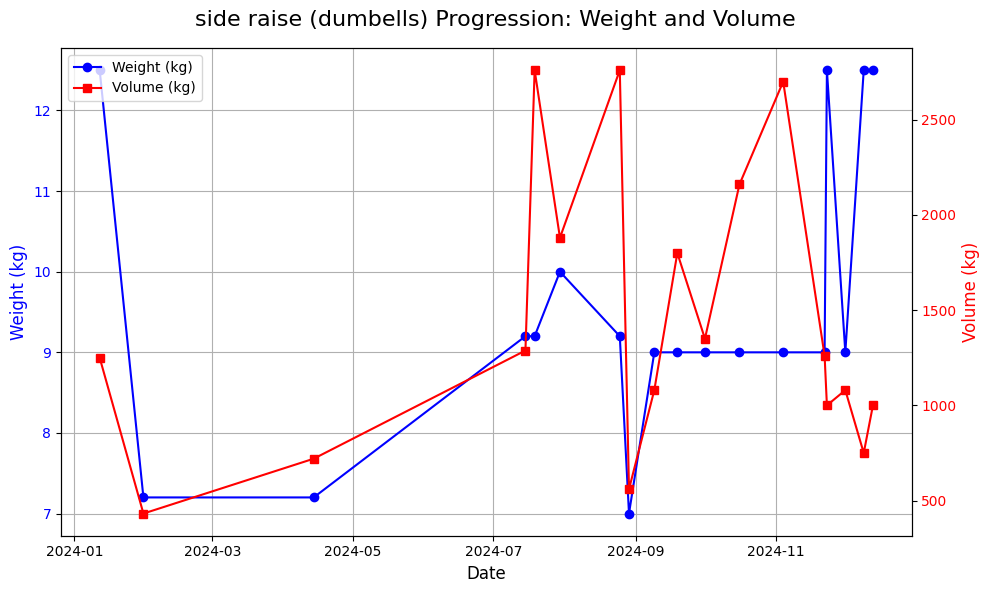

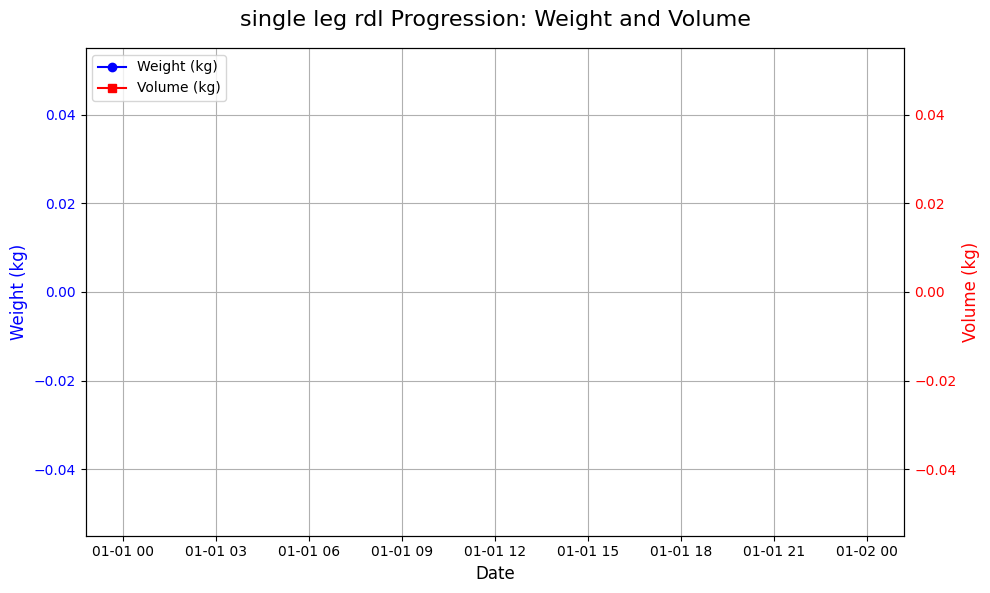

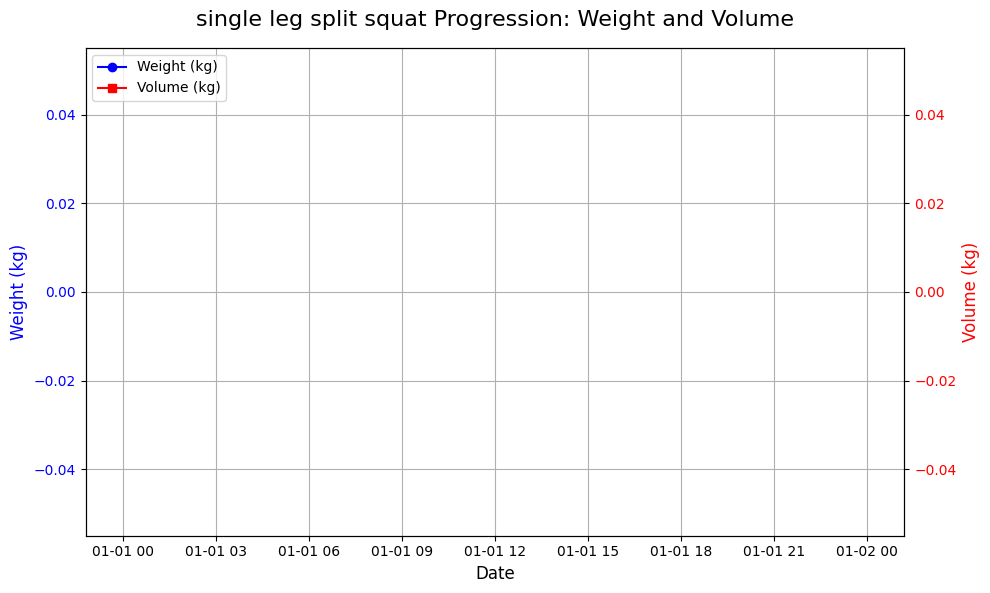

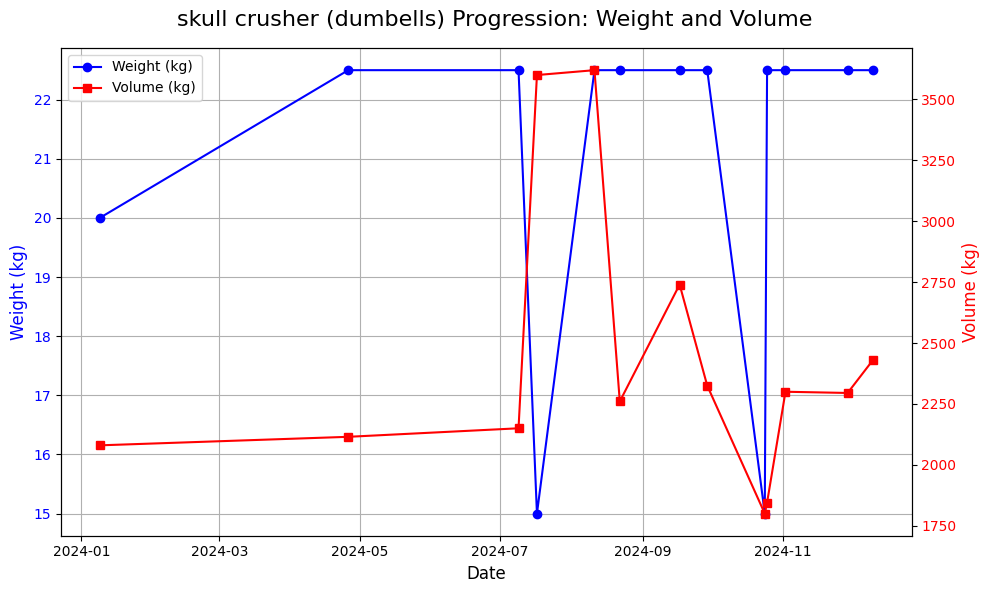

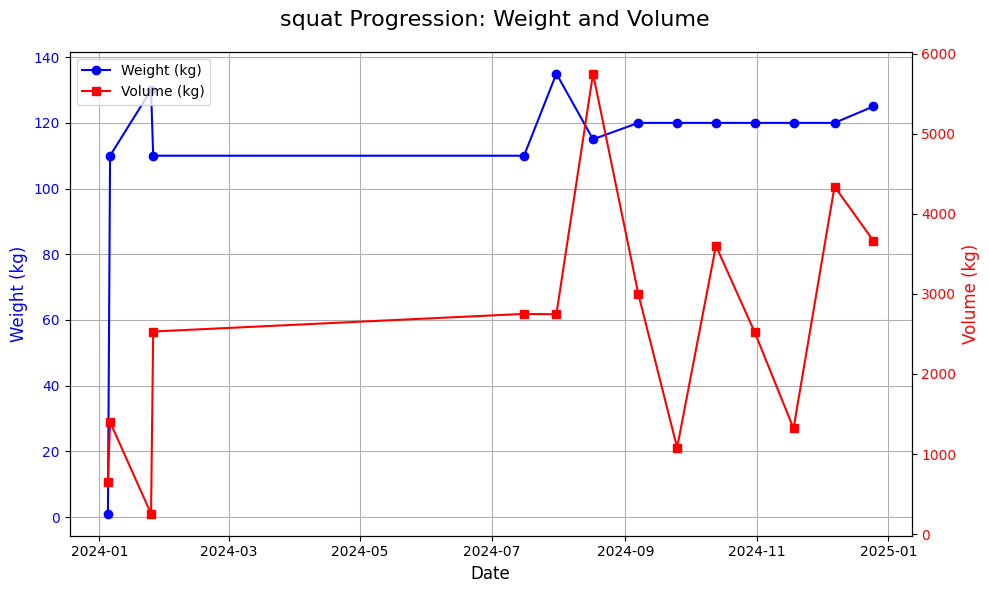

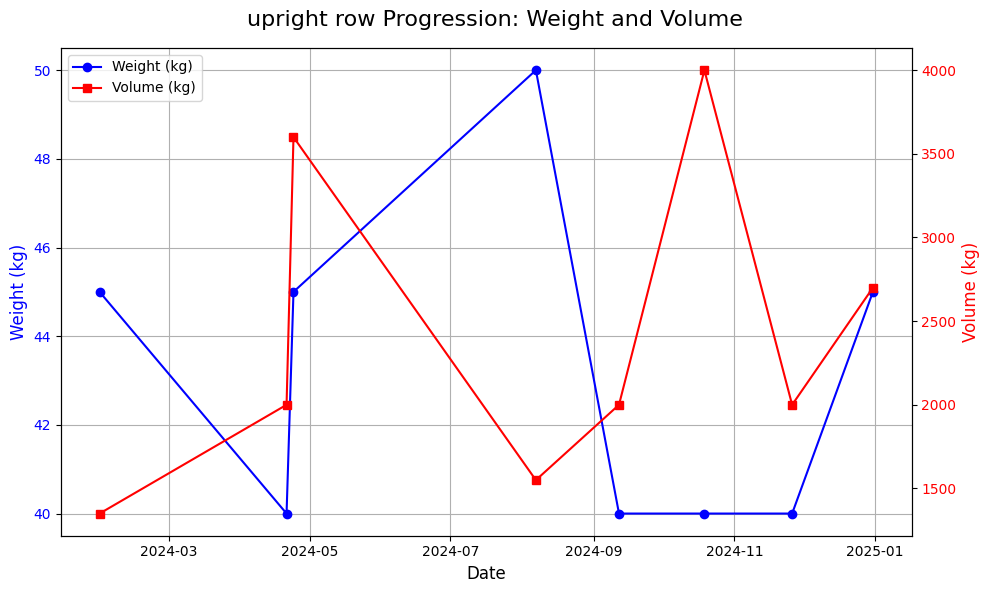

In [16]:
# create a plot visualising each exercise progression in a loop for the year 2024



for exercise in exercises:

    # create a df containing an exercise and dates from 2024
    exercise_2024 = df[
        (df['exercise'] == exercise) &
        (df['date'] >= '2024-01-01' ) &
        (df['date'] <= '2024-12-31' )
        ]

    # volume df
    exercise_volume_2024 = exercise_2024.groupby('date', as_index=False)['volume'].sum()
    exercise_volume_2024 = exercise_volume_2024.rename(columns={'volume': 'total_volume'})

    # Max weight df
    # group the entries by date and only select the one with the highest value for weight_kg
    exercise_max_2024 = exercise_2024.loc[exercise_2024.groupby('date')['weight_kg'].idxmax()]

    # Plotting both volume and max weight for each exercise

    # Create the plot
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot the first DataFrame (weight) on the left y-axis
    ax1.plot(exercise_max_2024['date'], exercise_max_2024['weight_kg'], color='blue', marker='o', label='Weight (kg)')
    ax1.set_ylabel('Weight (kg)', color='blue', fontsize=12)
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_xlabel('Date', fontsize=12)
    ax1.grid(True)

    # Create the second y-axis sharing the same x-axis
    ax2 = ax1.twinx()  # This creates a second y-axis
    ax2.plot(exercise_volume_2024['date'], exercise_volume_2024['total_volume'], color='red', marker='s', label='Volume (kg)')
    ax2.set_ylabel('Volume (kg)', color='red', fontsize=12)
    ax2.tick_params(axis='y', labelcolor='red')

    # Add titles and legends
    fig.suptitle(f'{exercise} Progression: Weight and Volume', fontsize=16)
    fig.tight_layout()  # Adjust layout to prevent overlap

    # Add a combined legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    plt.show()